<a href="https://colab.research.google.com/github/juansuribemo/bici-al-trabajo-2026/blob/main/taller_bici_al_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

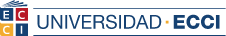
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

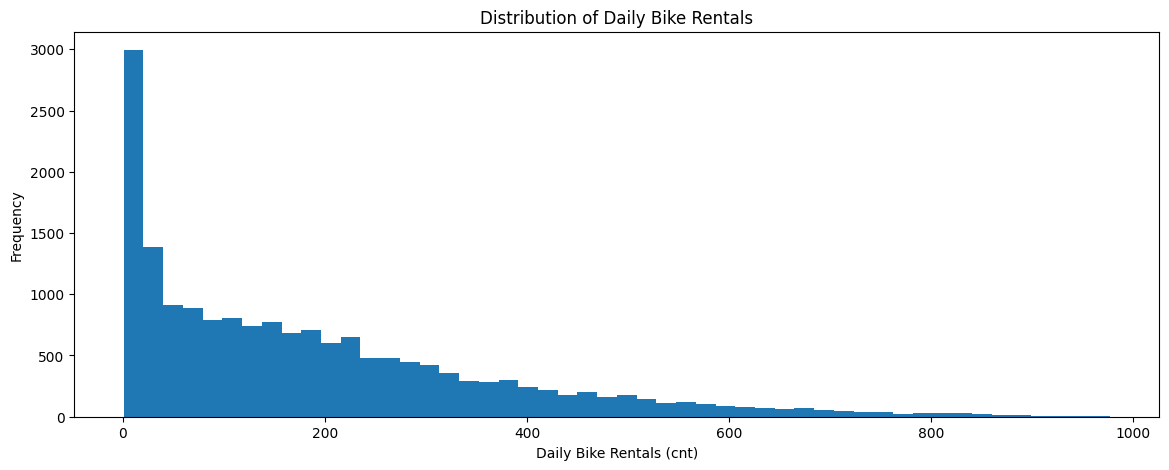

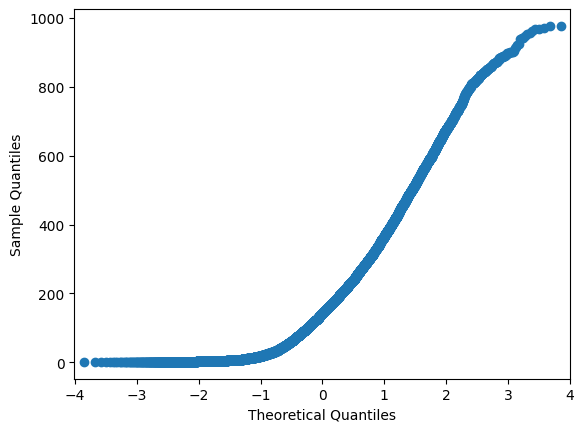

In [ ]:
# 1. Visualización
plt.figure(figsize=(14, 5))
plt.hist(df['cnt'], bins=50)
plt.xlabel("Daily Bike Rentals (cnt)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Bike Rentals")
plt.show()
from statsmodels.api import qqplot
qqplot(df['cnt'])
plt.show()

### **Interpretación pregunta 1**
#La pregunta se centra en si la distribución de la variable cnt (probablemente un conteo o cantidad) puede considerarse aproximadamente normal. Esto es importante porque muchas pruebas estadísticas requieren que los datos sigan una distribución normal para poder hacer inferencias precisas.

#Interpretación de los gráficos:

#Histograma: Muestra cómo se distribuyen los datos de cnt. Si la distribución tiene una forma simétrica y de campana (como una "curva normal"), podríamos decir que los datos se aproximan a una distribución normal.

#Gráfico Q-Q: Este gráfico compara la distribución de los datos con una distribución normal teórica. Si los puntos en el gráfico siguen una línea recta, entonces la distribución de los datos es aproximadamente normal.

#Lo que podríamos inferir:

#Si ambos gráficos (histograma y Q-Q) indican que los datos de cnt siguen una forma simétrica y cercana a la normal (es decir, el histograma parece una campana y los puntos en el Q-Q siguen la línea recta), entonces podríamos decir que sí, la distribución de cnt es aproximadamente normal.

#Si no es así, por ejemplo, si el histograma es sesgado o los puntos en el Q-Q no siguen la línea recta, eso indicaría que los datos no siguen una distribución normal. Esto afectaría el tipo de pruebas estadísticas que podrías utilizar en análisis posteriores.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
pearson_corr = df[columnas_relacion].corr(method='pearson')['cnt'].drop('cnt')
spearman_corr = df[columnas_relacion].corr(method='spearman')['cnt'].drop('cnt')

print("Pearson Correlation with cnt:")
print(pearson_corr)

print("\nSpearman Correlation with cnt:")
print(spearman_corr)

Pearson Correlation with cnt:
temp         0.404772
hum         -0.322911
windspeed    0.093234
Name: cnt, dtype: float64

Spearman Correlation with cnt:
temp         0.423330
hum         -0.359614
windspeed    0.126629
Name: cnt, dtype: float64


### **Interpretación pregunta 2**
#Se analiza la relación entre las variables cnt (que podría representar algún tipo de conteo o variable de interés en la producción) y otras variables como la temperatura (temp), humedad (hum) y velocidad del viento (windspeed). Para ello, se calculan dos tipos de correlación:

#Correlación de Pearson: Evalúa la relación lineal entre las variables.

#Correlación de Spearman: Evalúa la relación monótona (no necesariamente lineal).

#Los resultados muestran que:

#Pearson: La correlación con cnt es moderada para temp (0.40), negativa para hum (-0.32), y muy baja para windspeed (0.09).

#Spearman: Similarmente, la relación con temp es positiva (0.42), negativa para hum (-0.36), y baja para windspeed (0.13).

#Esto indica que la relación entre cnt y temp es más fuerte (y positiva) tanto lineal como monótonamente, mientras que windspeed tiene una relación casi nula.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**
#Desde una perspectiva de sistemas avanzados de producción, el Teorema Central del Límite (TLC) es fundamental para tomar decisiones basadas en muestras. En un entorno de producción, se requiere tomar decisiones eficientes y precisas, como el control de calidad o la optimización de procesos. A partir de muestras de tamaño n≥30, el TLC permite suponer que las medias muestrales siguen una distribución normal, lo que facilita el uso de herramientas estadísticas como pruebas de hipótesis y intervalos de confianza.

#Esto reduce la complejidad del análisis y mejora la confiabilidad en la toma de decisiones para ajustar y controlar los sistemas de producción, incluso cuando la distribución de la población no es normal. Sin embargo, con muestras más pequeñas, la validación de la normalidad se vuelve esencial para asegurar la validez de los resultados y evitar conclusiones erróneas que afecten la eficiencia del proceso.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

#realizar el test de hipotesis de una muestra
t_statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)

print(f"Estadística t: {t_statistic}")
print(f"Valor p: {p_value}")

#regla de decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La media de cnt es significativamente diferente de 4500.")
if p_value >= alpha:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para concluir que la media de cnt sea significativamente diferente de 4500.")


Estadística t: -2534.333902273014
Valor p: 0.0
Rechazamos la hipótesis nula. La media de cnt es significativamente diferente de 4500.


### **Interpretación pregunta 4**
#Interpretando el resultados podemos inferir que
#Si el valor p es menor que 0.05, significa que la media de cnt en los días laborales es significativamente diferente de 4,500, lo que indicaría que el valor de 4,500 no es representativo de la media en este contexto.
#Si el valor p es mayor que 0.05, no tenemos suficiente evidencia para rechazar la hipótesis nula, lo que sugiere que la media de cnt podría ser igual a 4,500, es decir, no hay evidencia suficiente para afirmar que la media es significativamente diferente.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [ ]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

#remuestro
for _ in range(n_iterations):
    bootstrap_sample = df['cnt'].sample(n=sample_size, replace=True)
    bootstrap_median = bootstrap_sample.median()
    medians.append(bootstrap_median)


#Interpretación pregunta 5
#Usando bootstrap, calculo un intervalo de confianza (IC) para la mediana de cnt. El IC se obtiene tomando el percentil 2.5% y el 97.5% de las 5,000 medianas generadas por el remuestreo. Esto me da un rango dentro del cual con un 95% de certeza se encuentra la mediana de la población.

#Si la distribución es sesgada, el bootstrap sigue siendo útil porque no depende de la forma de la distribución. Esto es ventajoso, ya que la mediana no se ve afectada por valores extremos, a diferencia de la media. Así, aunque los datos estén sesgados, el IC para la mediana sigue siendo confiable para decisiones de producción.